In [1]:
%load_ext autoreload

In [2]:
%autoreload
%matplotlib inline
import sys, pandas as pd, numpy as np
import matplotlib.pyplot as plt
if not '..' in sys.path: sys.path.append('..')
import cmat

## Creating a Confusion Matrix
The following code creates a simple confusion matrix from a very small dataset with three classes: foo, bar, and baz.

In [3]:
y_true = [1,1,3,1]
y_pred = [1,2,2,1]
labels = [1,2,3]
names  = ['foo', 'bar', 'baz']
cm = cmat.ConfusionMatrix.create( y_true, y_pred, labels, names )
cm

<ConfusionMatrix: num_classes=3>

The underlying matrix is just a pandas DataFrame with the class names as both columns and indices.

In [4]:
cm.cmat

,foo,bar,baz
foo,2,1,0
bar,0,0,0
baz,0,1,0


## Analysis

From here, we can get several key measures, including:

- `cm.accuracy`: The fraction of datapoints with corrrect predictons
- `cm.precision`: The fraction of predictions of a given class that were in fact that class.
- `cm.recall`: The fraction of ground truth datapoints of a given class that were correctly classified.
- `cm.f1score`: A measure that combines both precision and recall into a single scalar. [wikipedia](https://en.wikipedia.org/wiki/F1_score)
- `cm.iou`: Analoguous to F1 score. Also known as the [Jaccard index](https://en.wikipedia.org/wiki/Jaccard_index). It is the fraction of cardinalities between the set of correct predictions and the union of predictions and ground truths of a given class.

The metrics can be given per class with the notaton above, or as an average over all classes with the notation `cm.average_{metric}` (note: not available for accuracy since it is a single scalar in the first place). The cell below shows the per-class recall of our matrix. Note that bar is NaN; this is because there were no bar (2) occurences in the y_pred (ground truth) array. 

In [5]:
cm.recall

foo    0.666667
bar         NaN
baz    0.000000
dtype: float64

We can also generate a report of all the per-class metrics. Support is the number of occurrences of a given class in the ground truth, frac_support is the same number as a fraction of the total dataset size.

In [6]:
cm.class_report

,precision,recall,f1score,iou,frac_support,support
foo,1.0,0.666667,0.8,0.666667,0.75,3
bar,0.0,NaN,0.0,0.000000,0.00,0
baz,NaN,0.000000,0.0,0.000000,0.25,1


We can also get the same numbers averaged over classes. NaN values will be included, which is why e.g. rrecall is (0.667 + 0.0)/2.

In [7]:
cm.report

accuracy     0.500000
precision    0.500000
recall       0.333333
f1score      0.266667
iou          0.222222
dtype: float64

# Dropping zero values

In the event that you only care about non-zero rows or columns in the matrix. Classes can be dropped with `cm.drop_zero` according to the following rules.

- `true` Drop all classes whose rows sum up to zero (no occurences in y_true)
- `pred` Drop all classes whose colums sum up to zero (no occurences in y_pred)
- `either` Drop all classes whose rows **or** columns sum up to zero
- `both` Drop all classes whose rows **and** columns sum up to zero

Below, we drop all classes whose rows sum up to zero, which means that the "bar" class, wich did not occur in y_true will be ditched.

In [8]:
cm.drop_zero( 'true' ).cmat

,foo,baz
foo,2,0
baz,0,0


# Normalizing 

Sometimes, it is annoying to look at the raw counts in the matrix. It can, therefore, be useful to normalize the content so that rows or columns sums up to something. This can be done with the `cm.normalize` method, which must be called with one of the following rules:

- `recall`: Make the rows sum up to one
- `precision`: Make the columns sum up to one 
- `f1score`: Make the diagonal equal to the respective f1scores
- `iou`: Make the diagonal equal to the respective IOU scores


**Note:** the `normalize` method will return another confusion matrix object. Be careful to not using any of the analysis property on the normalized matrix as they will mostly give bogus numbers.

The example in the cell below normalizes with respect to recall so that the rows sum up to one. Not that the "bar" row is zero. As with normal recall, which was NaN for "bar" this is because there were no "bar" (2) occurrences in y_true.

In [12]:
cm.normalize( 'recall' ).cmat

,foo,bar,baz
foo,0.666667,0.333333,0.0
bar,0.000000,0.000000,0.0
baz,0.000000,1.000000,0.0


## Saving

The confusion matrix can be saved to csv with the `save( filepath )` method.

In [14]:
cm.save( 'my_cmat.csv' )
!cat my_cmat.csv

,foo,bar,baz
foo,2,1,0
bar,0,0,0
baz,0,1,0


And restored again with the `load( filepath )` static method

In [15]:
cmat.ConfusionMatrix.load( 'my_cmat.csv' ).cmat

,foo,bar,baz
foo,2,1,0
bar,0,0,0
baz,0,1,0


# Plotting

Finally, the confusion matrix is plottable. This can be done with the `plot` method.

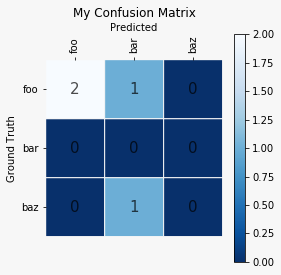

In [10]:
plt.figure( figsize=(4,4) )
cm.plot(
  # Ax to plot on, will create its own plot if not provided
  ax=plt.gca(),
  # Plot title
  title='My Confusion Matrix',
  # Whether to add text with numbers in each tile
  plot_text=True
);

Here's another example with a larger, more realistic matrix

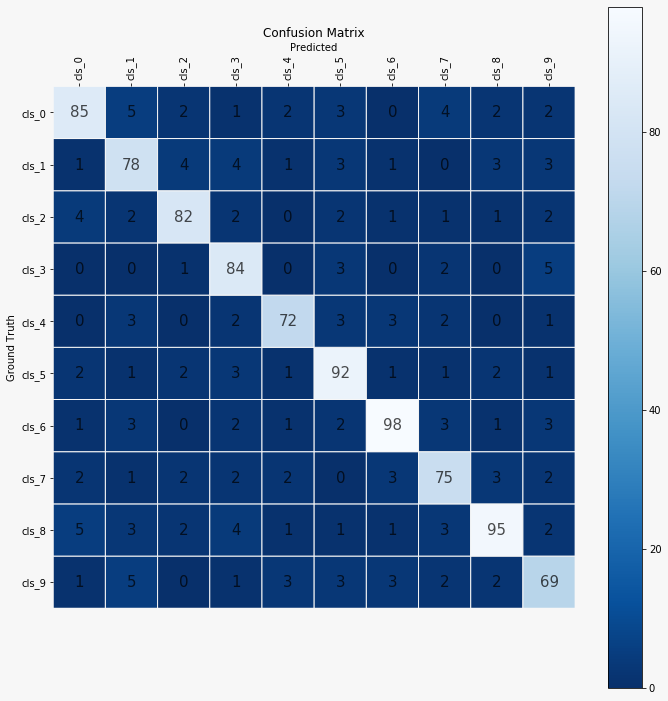

In [11]:
big_labels = list( range(10) )
big_names  = [ 'cls_%s'%i for i in big_labels ]
big_y_true = np.random.choice( big_labels, size=1000 )
# Create random predictions with 80% accuracy
big_y_pred = np.mod( big_y_true + np.random.choice(big_labels, size=1000)*(np.random.uniform(size=1000)>0.8), len(big_labels) )
cmat.ConfusionMatrix.create( big_y_true, big_y_pred, big_labels, big_names ).plot();